In [1]:
'''Carga de librerias de trabajo'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Lectura del Dataset de trabajo'''
data = pd.read_csv('Data/iris.csv')

In [3]:
data.shape

(150, 5)

In [4]:
'''Visualizacion rapida del contenido del Dataset'''
data.head(2)    

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [5]:
'''Ausencia de valores¿?'''
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

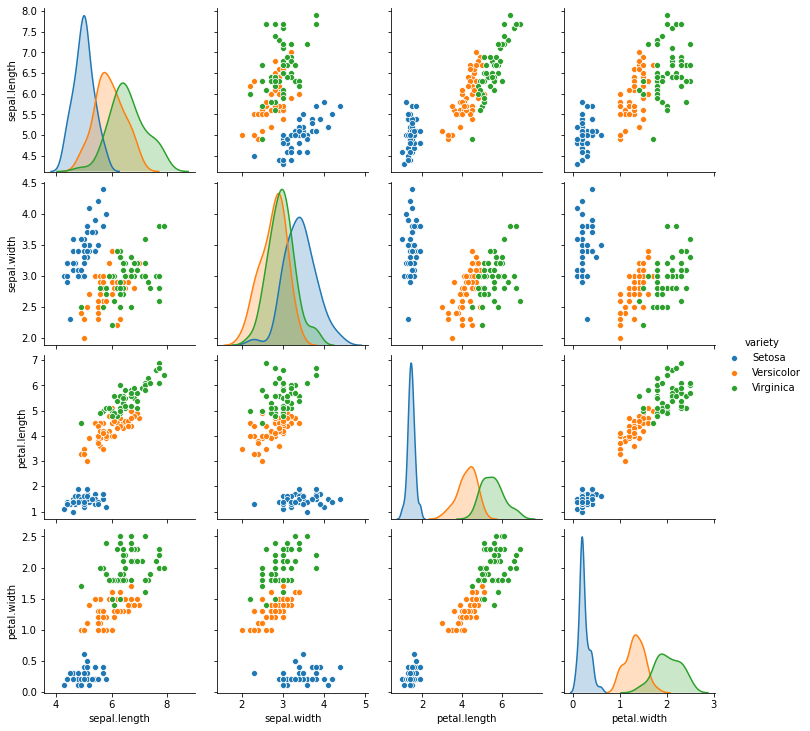

In [6]:
'''Graficos realizando separacion en funcion del tipo de variedad'''
sns.pairplot(data, hue='variety')

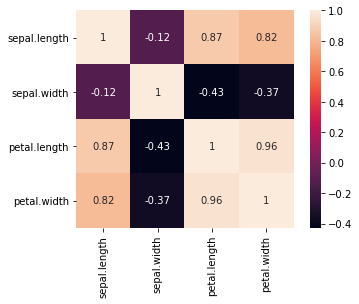

In [7]:
'''Columna mas correlacionadas entre si'''
corr = data.corr()
sns.heatmap(corr,  annot=True, square=True)

Con base en el Headmap, las variables con mayor correlacion, son `petal.length` y `petal.width`, por lo cual empleare estas variables como mi referencia, para una comparacion de los resultados obtenidos por KMEANS

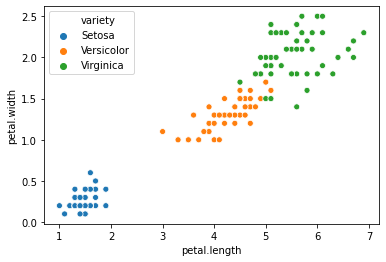

In [8]:
sns.scatterplot(data['petal.length'], data['petal.width'], hue=data['variety'])

In [9]:
'''Separo en X los datos'''
X = data.drop(['variety'], axis=1)
y = data['variety']

# PCA
### Reduccion de Dimecionalidad 

In [10]:
'''Importo el modelo'''
from sklearn.decomposition import PCA

In [11]:
'''Reduccion de dimeciones a un total de 2 columnas'''
pca = PCA(n_components=2) 
pca_iris = pca.fit_transform(X)

In [12]:
'''Obtengo el tipo de dato de la salida de PCA'''
type(pca_iris)

numpy.ndarray

In [13]:
'''Transformo a DataFrame'''
data_iris = pd.DataFrame(data = pca_iris, columns=['x1', 'x2'])

In [14]:
data_iris.head(2)

,x1,x2
0,-2.684126,0.319397
1,-2.714142,-0.177001


In [15]:
'''Empleo Kmeans para obtener la clasificacion de los datos'''
from sklearn.cluster import KMeans
kmeans_iris = KMeans(n_clusters=3)  

In [16]:
'''Entreno el modelo de KMEANS'''
kmeans_iris.fit(data_iris)

KMeans(n_clusters=3)

In [17]:
'''Agrego a mi Dataset proveniente de PCA, la clasificacion predicha por KMEANS'''
data_iris['KMEANS_Cluster'] = kmeans_iris.labels_
data_iris.head(2)

,x1,x2,KMEANS_Cluster
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0


Text(0.5, 1.0, 'Clasificiacion KMEANS')

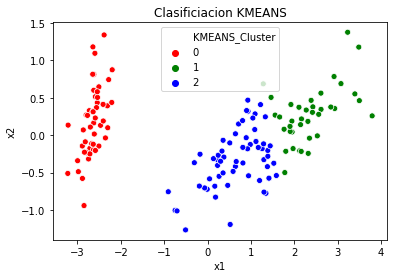

In [18]:
'''Grafico de clasificion por KMEANS'''
sns.scatterplot(data_iris['x1'], data_iris['x2'], hue=data_iris['KMEANS_Cluster'],
               palette=['red', 'green', 'blue'])
plt.title('Clasificiacion KMEANS')

Text(0.5, 1.0, 'Clasificacion real')

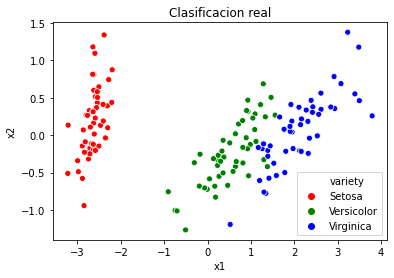

In [19]:
'''Grafico empleando clasficacion real'''
sns.scatterplot(data_iris['x1'], data_iris['x2'], hue=y,
               palette=['red', 'green', 'blue'])
plt.title('Clasificacion real')

### Conclusion
KMEANS logro realizar una clasificacion adecuada, aun cuando la Data de entrenamiento era proveniente de un PCA. El modelo presenta clasificaciones erroneas en los datos que presentan cercania en la union entre 'Versicolor' y 'Virginica'. Posiblemente ocasionada por la gran similitud de sus valores. En general KMEANS logra una correcta clasificacion de la Data.